In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
# MNIST dataset parameters.

num_classes = 10 # 0 to 9 digits

num_features = 784 # 28*28

# Training parameters.

learning_rate = 0.01

training_steps = 1000

batch_size = 256

display_step = 50

In [10]:
from tensorflow.keras.datasets import mnist

#(X_train, y_train), (x_test, y_test) = mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test)= mnist.load_data()
# Convert to float32.

#X_train, x_test = np.array(X_train, np.float32), np.array(x_test, np.float32)
X_train, X_test = np.array(X_train_full, np.float32), np.array(X_test, np.float32)

# Normalize images value from [0, 255] to [0, 1].

X_train, x_test = X_train / 255., X_test / 255.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape([-1, num_features]))
#X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test.reshape([-1, num_features]))

In [5]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

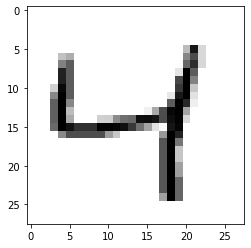

In [12]:
plt.imshow(X_train[2].reshape([28,28]),cmap='binary')

In [9]:
# Flatten images to 1-D vector of 784 features (28*28).

x_train, x_test = X_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

In [10]:
# Use tf.data API to shuffle and batch data.

train_data=tf.data.Dataset.from_tensor_slices((x_train,y_train))

train_data=train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [22]:
# Weight of shape [784, 10], the 28*28 image features, and a total number of classes.

W = tf.Variable(tf.ones([num_features, num_classes]), name="weight")

# Bias of shape [10], the total number of classes.

b = tf.Variable(tf.zeros([num_classes]), name="bias")

In [52]:
# Logistic regression (Wx + b).

def logistic_regression(x):

    # Apply softmax to normalize the logits to a probability distribution.

    return tf.nn.softmax(tf.matmul(x, W) + b)

# Cross-Entropy loss function.

def cross_entropy(y_pred, y_true):

    # Encode label to a one hot vector.

    y_true = tf.one_hot(y_true, depth=num_classes)

    # Clip prediction values to avoid log(0) error.

    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)

    # Compute cross-entropy.

    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

In [33]:
![title](home/linsamart/Pictures/encode.png)

/bin/sh: 1: Syntax error: word unexpected (expecting ")")


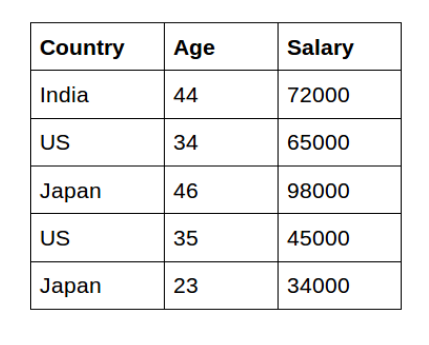

In [42]:
from IPython import display
display.Image("/home/linsamart/Pictures/encode.png")

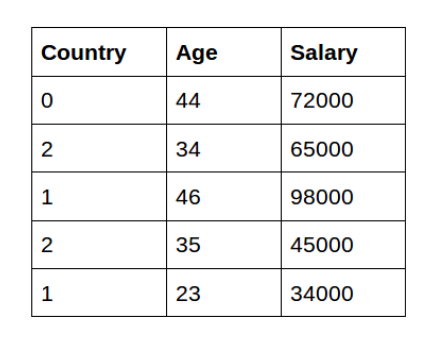

In [43]:
display.Image("/home/linsamart/Pictures/lencode.png")

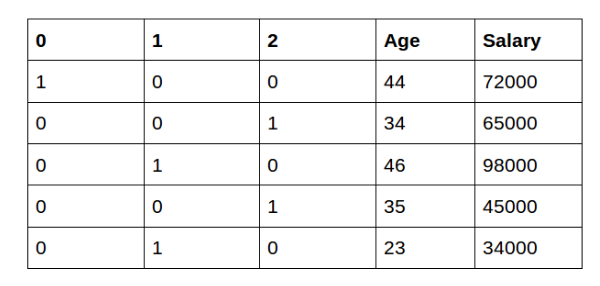

In [45]:
display.Image("/home/linsamart/Pictures/ohencode.png")

In [47]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [48]:
# Accuracy metric.

def accuracy(y_pred, y_true):

# Predicted class is the index of the highest score in prediction vector (i.e. argmax).
    
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))

    return tf.reduce_mean(tf.cast(correct_prediction, tf.float64))

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [49]:
# Optimization process. 

def run_optimization(x, y):

# Wrap computation inside a GradientTape for automatic differentiation.

    with tf.GradientTape() as g:

        pred = logistic_regression(x)

        loss = cross_entropy(pred, y)

    # Compute gradients.

    gradients = g.gradient(loss, [W, b])

    # Update W and b following gradients.

    optimizer.apply_gradients(zip(gradients, [W, b]))

In [53]:
# Run training for the given number of steps.

for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):

    # Run the optimization to update W and b values.

    run_optimization(batch_x, batch_y)

    

    if step % display_step == 0:

        pred = logistic_regression(batch_x)

        loss = cross_entropy(pred, batch_y)

        acc = accuracy(pred, batch_y)

        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 50, loss: 138.353622, accuracy: 0.847656
step: 100, loss: 118.047104, accuracy: 0.882812
step: 150, loss: 75.900124, accuracy: 0.929688
step: 200, loss: 130.578751, accuracy: 0.882812
step: 250, loss: 89.368965, accuracy: 0.929688
step: 300, loss: 103.455086, accuracy: 0.882812
step: 350, loss: 213.946777, accuracy: 0.851562
step: 400, loss: 168.077377, accuracy: 0.851562
step: 450, loss: 68.365952, accuracy: 0.921875
step: 500, loss: 101.977982, accuracy: 0.882812
step: 550, loss: 126.755608, accuracy: 0.875000
step: 600, loss: 150.271088, accuracy: 0.871094
step: 650, loss: 645.156555, accuracy: 0.687500
step: 700, loss: 53.483017, accuracy: 0.925781
step: 750, loss: 112.928680, accuracy: 0.917969
step: 800, loss: 70.738937, accuracy: 0.914062
step: 850, loss: 66.672493, accuracy: 0.937500
step: 900, loss: 59.828320, accuracy: 0.910156
step: 950, loss: 90.657509, accuracy: 0.878906
step: 1000, loss: 103.293823, accuracy: 0.902344


In [54]:
# Test model on validation set.

pred = logistic_regression(x_test)

print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.905500


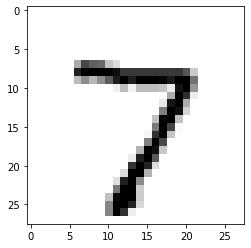

In [67]:
plt.imshow(x_test[0].reshape(28,28),cmap='binary')

In [15]:
predNum=0

In [64]:
pred[predNum].numpy()

array([4.4823321e-07, 1.2096213e-12, 4.7017306e-06, 1.9853881e-03,
       1.7355961e-09, 1.5596490e-06, 1.7497732e-12, 9.9799371e-01,
       2.7373083e-08, 1.4267834e-05], dtype=float32)

In [63]:
pred[predNum].numpy().argmax()

7

In [58]:
y_test[predNum]

7

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [13]:
logisticRegr.fit(x_train, y_train)

/home/linsamart/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [14]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[predNum].reshape(1,-1))

array([7], dtype=uint8)